<a href="https://colab.research.google.com/github/darvesh-sd/Copy-of-TPSessions.ipynb/blob/main/TP5_No_1_La_Profanite_et_la_Toxicite_avec_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Necessary Libraries**

In [ ]:
!pip install spacy
!pip install textblob
!pip install matplotlib
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Import Libraries and Load the spaCy Model**

In [8]:
import random
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the English tokenizer model from spaCy
nlp = spacy.load("en_core_web_sm")


**Generate a Corpus of 10,000 Words**

In [9]:
# Sample sentences related to the US election (toxic content)
election_sentences = [
    "The election results are rigged, it's all a scam!",
    "These politicians are nothing but liars, we need to take action.",
    "This election was stolen from the people, it's completely unfair.",
    "The current administration is destroying the country, we need change.",
    "Both parties are corrupt, it's all about money and power.",
    "Anyone who supports this policy is an idiot.",
    "I can't believe how stupid people are to vote for this candidate.",
    "The media is lying to us, they want to control everything.",
    "If you're still voting for that clown, you're a fool.",
    "This country is doomed with the way things are going.",
    "The system is rigged to keep certain people in power.",
    "Why are we even bothering with this broken system?"
]

# Generate a corpus of 10,000 words by repeating sentences randomly
corpus = " ".join([random.choice(election_sentences) for _ in range(1000)])

print(f"Generated Corpus Length: {len(corpus.split())} words")


Generated Corpus Length: 10019 words


**Preprocess the Text Using spaCy Tokenizer**

In [10]:
# Function to preprocess the text (tokenization using spaCy)
def preprocess_text(corpus):
    doc = nlp(corpus.lower())  # Tokenize and convert to lowercase
    return [token.text for token in doc if token.is_alpha]  # Filter out non-alphabetic tokens

# Preprocess the corpus
processed_corpus = preprocess_text(corpus)
print(f"Processed Corpus Length: {len(processed_corpus)} words")


Processed Corpus Length: 10019 words


**Sentiment Detection Using TextBlob**

In [11]:
# Function to check for negativity (possible toxic sentences) using TextBlob
def check_sentiment(sentences):
    sentiment_results = []
    for sentence in sentences:
        blob = TextBlob(sentence)
        # If polarity is less than -0.1, classify as negative/toxic
        if blob.sentiment.polarity < -0.1:
            sentiment_results.append(1)  # Toxic sentence
        else:
            sentiment_results.append(0)  # Non-toxic sentence
    return sentiment_results

# Break the corpus into sentences
sentences = corpus.split(".")

# Check for sentiment in the sentences (negative sentences are toxic)
sentiment_results = check_sentiment(sentences)

# Count sentences with negative sentiment
toxic_sentences = sum(sentiment_results)
non_toxic_sentences = len(sentiment_results) - toxic_sentences

# Print results
print(f"Total Sentences: {len(sentences)}")
print(f"Toxic Sentences (Sentiment Detected): {toxic_sentences}")
print(f"Non-Toxic Sentences: {non_toxic_sentences}")


Total Sentences: 856
Toxic Sentences (Sentiment Detected): 384
Non-Toxic Sentences: 472


**Visualize the Results**

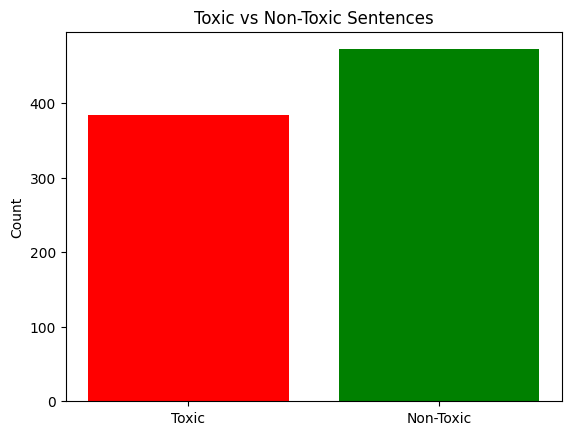

In [12]:
# Visualization of toxic vs non-toxic sentences
labels = ['Toxic', 'Non-Toxic']
counts = [toxic_sentences, non_toxic_sentences]

plt.bar(labels, counts, color=['red', 'green'])
plt.title('Toxic vs Non-Toxic Sentences')
plt.ylabel('Count')
plt.show()
